In [1]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from __future__ import print_function
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples, loadMCSamples
import getdist, IPython
import pylab as plt
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))
#matplotlib 2 doesn't seem to work well without usetex on
plt.rcParams['text.usetex']=True
#import seaborn as sns
#sns.set()

import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_context("talk")
#sns.set_context("poster")
palette = sns.color_palette()

#plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'lines.linewidth':3})
#plt.rcParams.update({'usetex': True})

#cp = sns.color_palette()
plt.rcParams.update({'font.size': 22})

GetDist Version: 1.3.3, Matplotlib version: 3.3.1


In [7]:
#I just picked out a few examples from
#https://getdist.readthedocs.io/en/latest/plot_gallery.html
#and adapted to this case

In [2]:
import os
from glob import glob
PATH = './New_Files/'
file_names = [y for x in os.walk(PATH) for y in glob(os.path.join(x[0], 'chain*'))]
file_names

['./New_Files/chain_1.txt',
 './New_Files/chain_2.txt',
 './New_Files/chain_5.txt',
 './New_Files/chain_8.txt',
 './New_Files/chain_4.txt',
 './New_Files/chain_3.txt',
 './New_Files/chain_7.txt',
 './New_Files/chain_6.txt']

In [3]:
#Quick convert to add an importance weight column left of -Log(like) column
for idx, file in enumerate(file_names):
    inChain = np.loadtxt(file,delimiter=',')
    nsamps, npar = inChain.shape
    outChain = np.zeros((nsamps,npar+1))
    outChain[:,1:] = np.copy(inChain)
    outChain[:,0] = 1.
    np.savetxt('./convert_{}.txt'.format(idx+1),outChain)

In [8]:
# samples = loadMCSamples('./convert', settings={'ignore_rows':0.3})
samples = loadMCSamples('./convert')

./convert_6.txt
./convert_1.txt
./convert_7.txt
./convert_3.txt
./convert_5.txt
./convert_8.txt
./convert_2.txt
./convert_4.txt
Removed no burn in


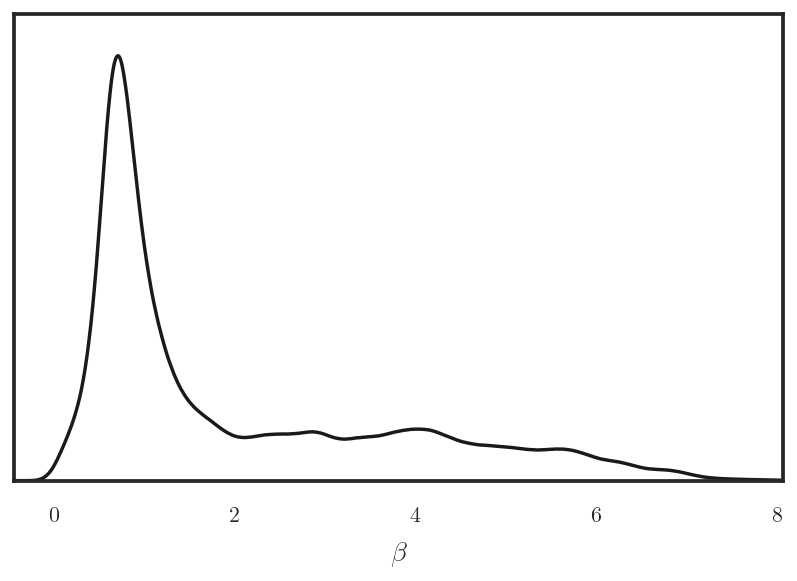

In [9]:
# 1D marginalized plot
g = plots.get_single_plotter(width_inch=6)
g.plot_1d(samples, 'p1')

((-0.4429640636567837, 8.063129871151867),
 (-0.2609014932695232, 4.904798774520837))

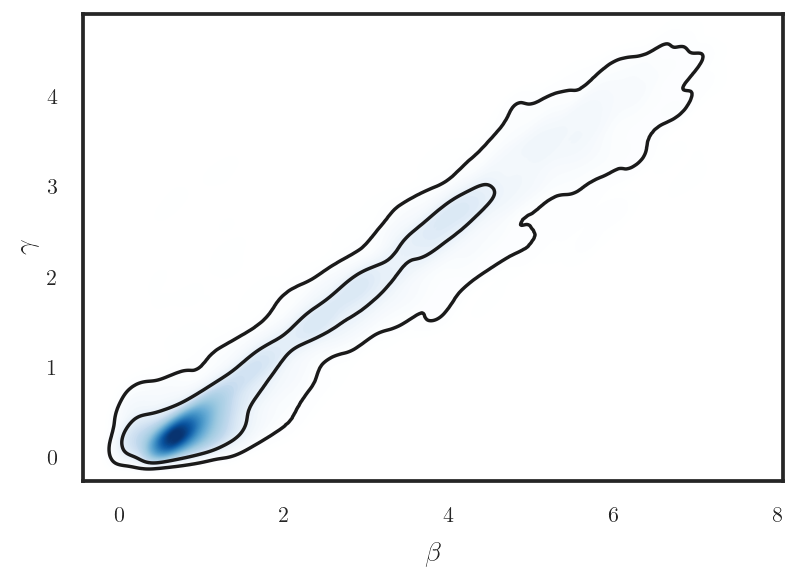

In [10]:
from getdist import plots
g = plots.getSinglePlotter()
g.plot_2d(samples, ['p1', 'p2'],shaded=True)

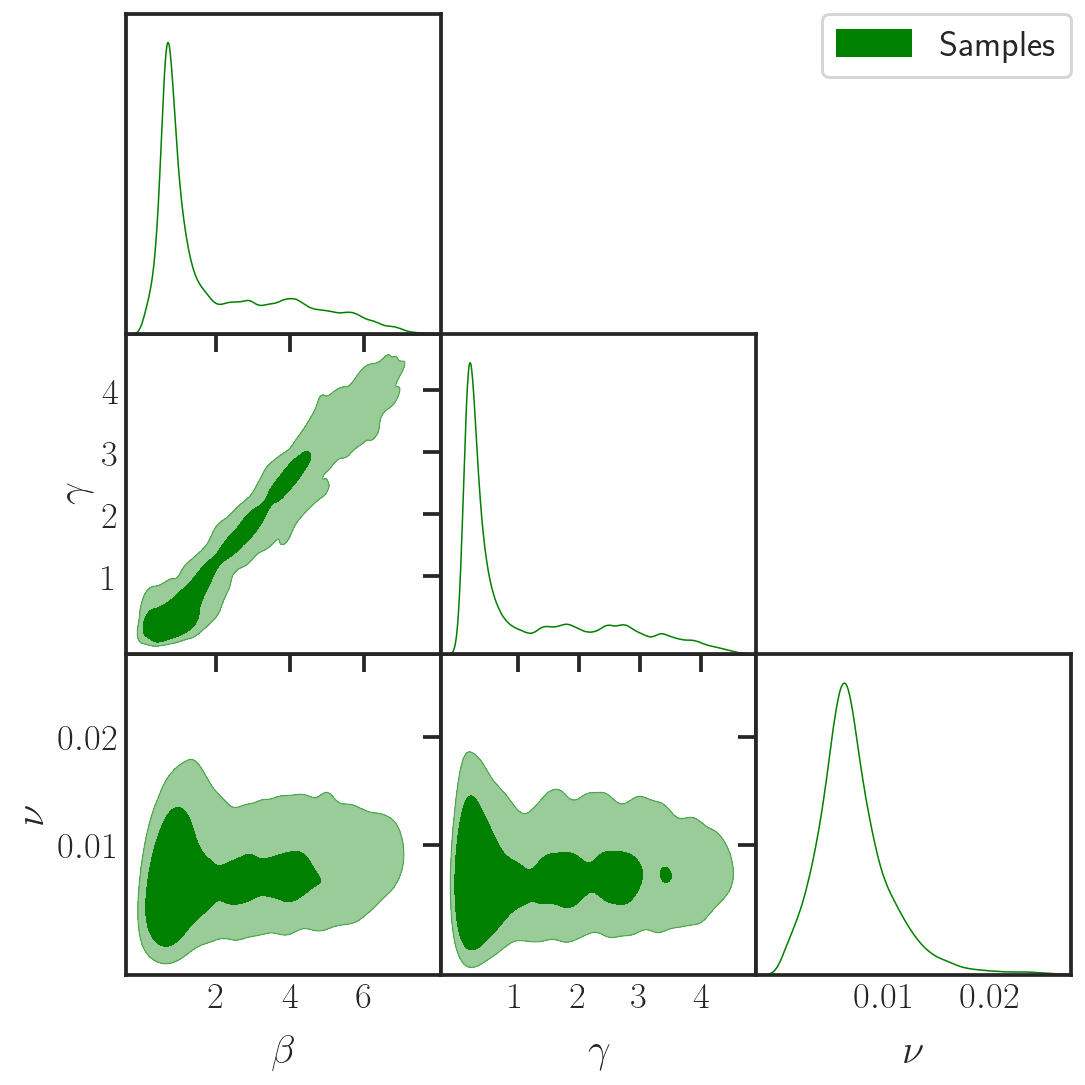

In [11]:
g = plots.getSubplotPlotter(width_inch=8)
#g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.4
g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 22
g.settings.legend_fontsize = 20
g.triangle_plot([samples], ['p1', 'p2','p3'], 
    filled_compare=True, 
    legend_labels=['Samples'], 
    legend_loc='upper right', 
    line_args=[{'ls':'-', 'color':'green'}], 
    contour_colors=['green'])
g.export('Triangle.pdf')

In [12]:
# Many other things you can do besides plot, e.g. get latex
# Default limits are 1: 68%, 2: 95%, 3: 99% probability enclosed
# See  https://getdist.readthedocs.io/en/latest/analysis_settings.html
# and examples for below for changing analysis settings 
# (e.g. 2hidh limits, and how they are defined)
print(samples.getInlineLatex('p1',limit=2))
print(samples.getInlineLatex('p2',limit=2))
print(samples.getInlineLatex('p3',limit=2))
print(samples.getTable().tableTex())

\beta = 2.0^{+3.8}_{-1.9}
\gamma = 1.2^{+2.5}_{-1.2}
\nu = 0.0072^{+0.0069}_{-0.0065}
\begin{tabular} { l  c}

 Parameter &  95\% limits\\
\hline
{\boldmath$\beta          $} & $2.0^{+3.8}_{-1.9}         $\\

{\boldmath$\gamma         $} & $1.2^{+2.5}_{-1.2}         $\\

{\boldmath$\nu            $} & $0.0072^{+0.0069}_{-0.0065}$\\
\hline
\end{tabular}


In [13]:
print(samples.PCA(['p1','p2','p3']))

PCA for parameters:
         1 :\beta
         2 :\gamma
         3 :\nu

Correlation matrix for reduced parameters
          p1 :  1.0000  0.9584  0.2568
          p2 :  0.9584  1.0000  0.1240
          p3 :  0.2568  0.1240  1.0000

e-values of correlation matrix
PC 1:   0.0321
PC 2:   0.9387
PC 3:   2.0292

e-vectors
  1:  0.7134 -0.1084  0.6923
  2: -0.6935 -0.2508  0.6754
  3: -0.1004  0.9620  0.2541

Principle components
PC1 (e-value: 0.032102)
[1.763103]   (\beta-2.012701)/1.000000)
[-1.714049]   (\gamma-1.161631)/-0.696743)
[-0.248171]   (\nu-0.007163)/-0.014245)
          = 0.000000 +- 0.442809

PC2 (e-value: 0.938736)
[-0.000398]   (\beta-2.012701)/-4425.320045)
[-0.000922]   (\gamma-1.161631)/-1295.772783)
[0.003535]   (\nu-0.007163)/1.000000)
          = -0.000000 +- 0.003561

PC3 (e-value: 2.029162)
[1.763103]   (\beta-2.012701)/1.000000)
[1.719871]   (\gamma-1.161631)/0.694385)
[0.647096]   (\nu-0.007163)/0.005463)
          = -0.000000 +- 3.627613

Correlations of princip

In [14]:
stats = samples.getMargeStats()
lims0 = stats.parWithName('p1').limits
lims1 = stats.parWithName('p2').limits
lims2 = stats.parWithName('p3').limits
for conf, lim0, lim1, lim2 in zip(samples.contours,lims0, lims1, lims2):
    print('p1 %s%% lower: %.3f upper: %.3f (%s)'%(conf, lim0.lower, lim0.upper, lim0.limitType()))
    print('p2 %s%% lower: %.3f upper: %.3f (%s)'%(conf, lim1.lower, lim1.upper, lim1.limitType()))
    print('p3 %s%% lower: %.3f upper: %.3f (%s)'%(conf, lim2.lower, lim2.upper, lim2.limitType()))

p1 0.68% lower: 0.161 upper: 4.237 (two tail)
p2 0.68% lower: 0.011 upper: 2.803 (two tail)
p3 0.68% lower: 0.004 upper: 0.009 (two tail)
p1 0.95% lower: 0.072 upper: 5.790 (two tail)
p2 0.95% lower: -0.012 upper: 3.659 (two tail)
p3 0.95% lower: 0.001 upper: 0.014 (two tail)
p1 0.99% lower: 0.051 upper: 6.987 (two tail)
p2 0.99% lower: -0.037 upper: 4.271 (two tail)
p3 0.99% lower: 0.000 upper: 0.022 (two tail)
